# Data Processing 
 In this step, categorical features need be encoded to numeric and numeric features need to be standardized

### Load data


In [502]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, confusion_matrix, classification_report, roc_auc_score, auc
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score,log_loss
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score

In [503]:
df = pd.read_csv('../fixed data/diabetes_data.csv', index_col = 0)

In [504]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  Class               520 no

In [506]:
#change the category of all categorical variables to catgory
for col in df.columns[1:]:
    df[col] = df[col].astype('category')

In [507]:
df.dtypes

Age                      int64
Gender                category
Polyuria              category
Polydipsia            category
sudden weight loss    category
weakness              category
Polyphagia            category
Genital thrush        category
visual blurring       category
Itching               category
Irritability          category
delayed healing       category
partial paresis       category
muscle stiffness      category
Alopecia              category
Obesity               category
Class                 category
dtype: object

## 1. Define target variable y and data X

### a. define target variable y

In [508]:
y = df['Class'].replace({'Positive':1,'Negative': 0})
y.shape


(520,)

Visualize target variable 

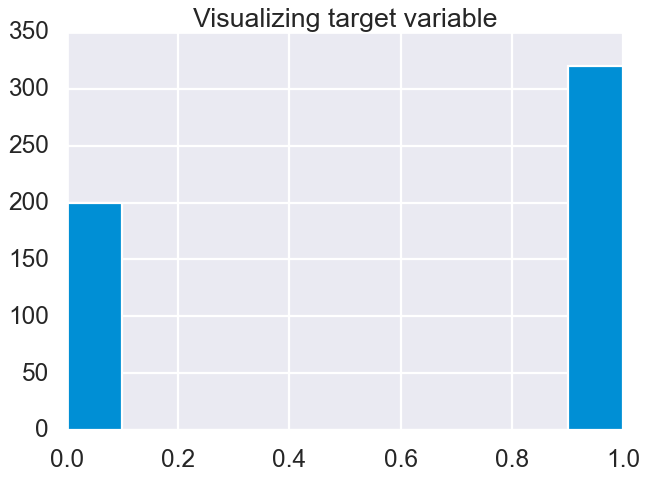

In [509]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.hist(y,density= False)
plt.title('Visualizing target variable');

### b. Define X

In [510]:
X = df.drop('Class',axis=1)
X.head()
X.shape,X.columns

((520, 16),
 Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
        'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
        'Itching', 'Irritability', 'delayed healing', 'partial paresis',
        'muscle stiffness', 'Alopecia', 'Obesity'],
       dtype='object'))

In [511]:
X.iloc[:,1:].columns

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

### c. hotencode all the non numeric variables, and y 

In [512]:
# age is continuous so it is not included in get_dummies
numeric_X = pd.get_dummies(X.iloc[:,1:], drop_first=True)

In [513]:

numeric_X.shape,numeric_X.columns

((520, 15),
 Index(['Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes',
        'sudden weight loss_Yes', 'weakness_Yes', 'Polyphagia_Yes',
        'Genital thrush_Yes', 'visual blurring_Yes', 'Itching_Yes',
        'Irritability_Yes', 'delayed healing_Yes', 'partial paresis_Yes',
        'muscle stiffness_Yes', 'Alopecia_Yes', 'Obesity_Yes'],
       dtype='object'))

### d. Age is a continuous variable and we need to scale it for logistic regression

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

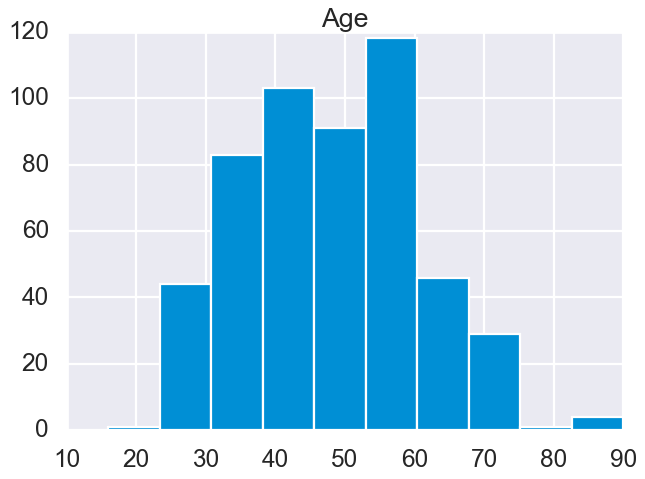

In [514]:
age = X[['Age']].copy()
age.hist()

In [515]:
#import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [516]:

age.head()

,Age
0,40
1,58
2,41
3,45
4,60


In [517]:
st = StandardScaler()
minmax = MinMaxScaler()
age['age_scaled'] = st.fit_transform(age[['Age']])
age['age_minmax'] = minmax.fit_transform(age[['Age']])

#age_t = st.transform(age)
age.head()

,Age,age_scaled,age_minmax
0,40,-0.661367,0.324324
1,58,0.821362,0.567568
2,41,-0.578993,0.337838
3,45,-0.249498,0.391892
4,60,0.986110,0.594595


Text(0.5, 1.0, 'MinMax scaled Age')

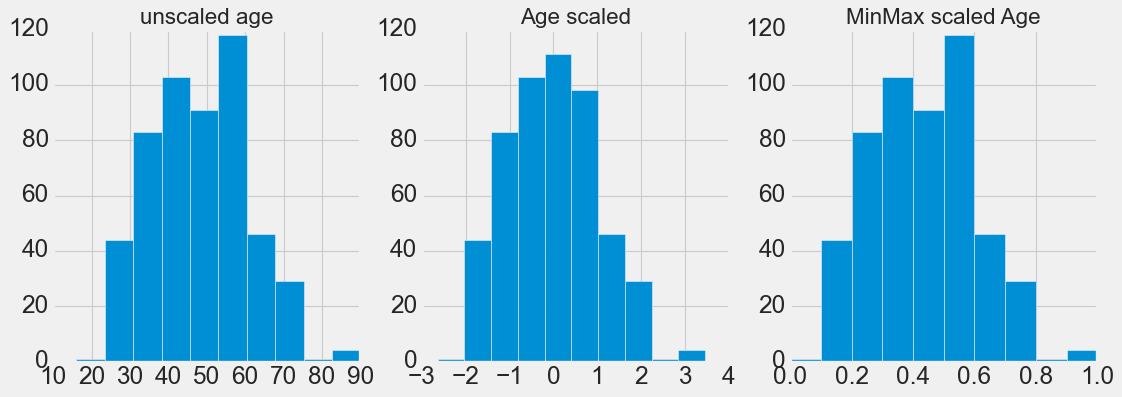

In [518]:
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(1,3, figsize=(15,5))
ax[0].hist(X['Age'])
ax[0].set_title('unscaled age')
ax[1].hist(age['age_scaled'])
ax[1].set_title('Age scaled')
ax[2].hist(age.age_minmax)
ax[2].set_title('MinMax scaled Age')


## 2. Split the data into train. and test sets for Logistic regression

In [519]:
#add age_scaled to numeric_X
X_scaled = numeric_X.join(age.age_scaled)
X_scaled.head()

,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,age_scaled
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,-0.661367
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0.821362
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,-0.578993
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,-0.249498
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0.986110


In [520]:
#add age_minmax to numeric_X
X_minmax = numeric_X.join(age.age_minmax)
X_minmax.head()

,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,age_minmax
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,0.324324
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0.567568
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0.337838
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0.391892
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0.594595


### a. split data into training/test data

In [527]:
X_train_s, X_test_s,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.20,random_state = 123)
X_train_minmax,X_test_minmax,y_train,y_test= train_test_split(X_minmax,y,test_size = 0.20,random_state = 123)

In [528]:
X_train_s.shape,y_train.shape,X_test_s.shape,y_test.shape


((416, 16), (416,), (104, 16), (104,))

In [530]:
X_train_minmax.shape,y_train.shape,X_test_minmax.shape,y_test.shape

((416, 16), (416,), (104, 16), (104,))

### b. Implement logistic regression model on train data

In [243]:
from sklearn.linear_model import LogisticRegression
 

In [531]:
#logistic regression with default settings of C=1, and l2 regularizaion
lr = LogisticRegression()
model = lr.fit(X_train_s,y_train)

In [532]:
lr.coef_[0]


array([-2.34687583e+00,  2.42278458e+00,  2.74794604e+00,  8.23167169e-01,
        3.93241192e-01,  5.43798664e-01,  1.10998491e+00,  6.33724369e-01,
       -9.13472568e-01,  1.73996268e+00, -5.73567768e-01,  1.17464725e+00,
        1.38751982e-03, -1.74172321e-01, -3.15097907e-01, -4.80290800e-01])

In [533]:
y_pred = lr.predict(X_test_s)


In [588]:

model_m = lr.fit(X_train_minmax,y_train)
y_pred_m = model_m.predict(X_test_minmax)
model.score(X_test_s,y_test),model.score(X_test_minmax,y_test)# score is accuracy


(0.9230769230769231, 0.9423076923076923)

In [604]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('accuracy tp+tn/all: ', accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred_m))


accuracy tp+tn/all:  0.9326923076923077 0.9423076923076923


since the data has more positive cases than negative (60% positive) so accuracy might not be the best metric to use 

In [445]:
pd.crosstab(y_test, y_pred, rownames = ['Actual'],colnames=['predicted'])

predicted,0,1
Actual,,
0,36,2
1,5,61


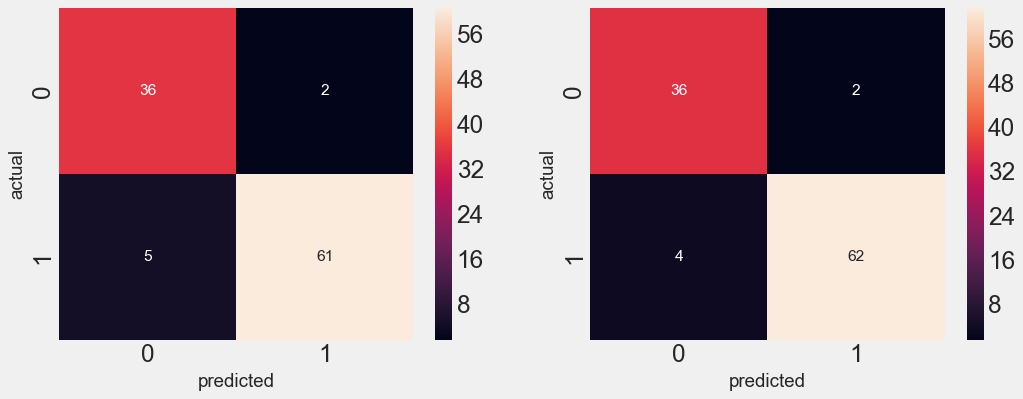

In [545]:
plt.figure(figsize=(14,5))
c_matrix_s = confusion_matrix(y_test,y_pred)
c_matrix_m = confusion_matrix(y_test,y_pred_m)
plt.subplot(1,2,1)
sns.heatmap(c_matrix,annot = True)
plt.xlabel('predicted')
plt.ylabel('actual')

plt.subplot(1,2,2)
sns.heatmap(c_matrix_m,annot = True)
plt.xlabel('predicted')
plt.ylabel('actual');

StandardScaler: out of the 66 positive cases 61 were predicted correctly, and out of the 38 negative cases 36 were predicted correctly. However, 5 of the cases that were positive were predicted incorrectly, false negative, and 2 cases were predicted positive incorrectly, false positive. A false negative is more serious because it ignores the disease and a false positive would lead to unnecessary treatment. So the model needs to be optimized by optimizing the hyper parameters C, which is the inverse regularization, and l1,l2 regularization. Gridsearch can be used.
MinMax: gives a better true positive rate which means more disease will be predicted correctly.

In [448]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        38
           1       0.97      0.92      0.95        66

    accuracy                           0.93       104
   macro avg       0.92      0.94      0.93       104
weighted avg       0.94      0.93      0.93       104



In [546]:
print(classification_report(y_test,y_pred_m))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        38
           1       0.97      0.94      0.95        66

    accuracy                           0.94       104
   macro avg       0.93      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104



Normalizing the data gives better results in all the metrics so normalized data will be used in model

In [602]:
y_pred_proba = model.predict_proba(X_test_minmax)[:,1]

fp,tp,threshold = roc_curve(y_test,y_pred_proba)
roc_auc_score(y_test,y_pred_proba)


0.9768740031897926

Text(0.5, 1.0, 'ROC curve')

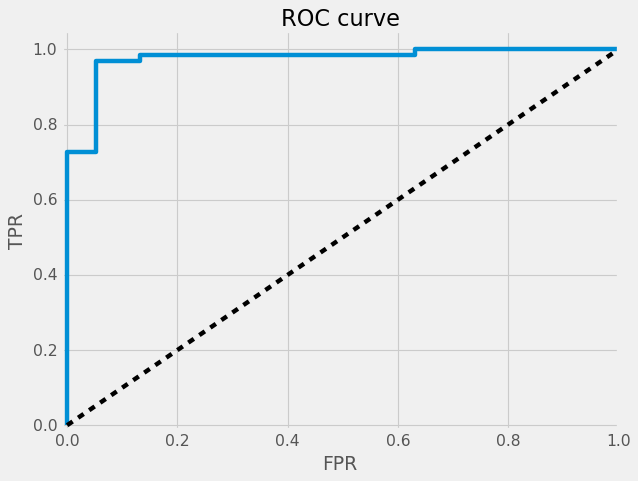

In [469]:
plt.plot(fp,tp)
plt.plot([0,1],[0,1],linestyle='--', c='k')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([-0.01,1])
plt.ylim([-0.01,1.05])
plt.title('ROC curve')

In [550]:
roc_auc_score(y_test,y_pred_m)

0.9433811802232857

AUC is a measure of the area under the curve. It shows how well does the model distinguish between positives and 
negatives. The higher the auc the better the model is at predicting 0s and 1s

### 3. GridSearch

Tuning C parameter: C parameter is the inverse of regularization parameter lambda. When C is too large, lambda is small which means the model can become too complex and over fit the data. However, when C is too small, lambda is large which means model can become too simple and over fit the data.

In [554]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lr.

In [615]:
params = {'C':[0.001,0.01,0.1,1,5,10,25],'penalty' : [ 'l2']}
grid_lr = GridSearchCV(lr, param_grid = params, scoring = 'recall',cv=5)
best_params = grid_lr.fit(X_train_minmax,y_train)
best_params

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 25],
                         'penalty': ['l2']},
             scoring='recall')

In [613]:
grid_lr.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [596]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier().fit(X_train_s,y_train)
y_pred_rf = model_rf.predict(X_test_minmax)
model_rf.score(X_test_s,y_test)
confusion_matrix(y_test,y_pred_rf)

array([[38,  0],
       [ 1, 65]])

In [600]:
(y_pred_rf==1).sum()

65

we care about false positives, here we have 0 fn but 1 false positive

In [599]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.98      0.99        66

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104

